In [1]:
import cv2
import winsound
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

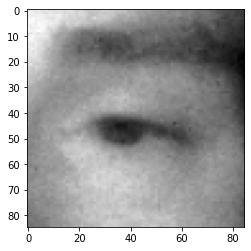

In [2]:
img_array = cv2.imread('s0001_00179_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap = "gray")

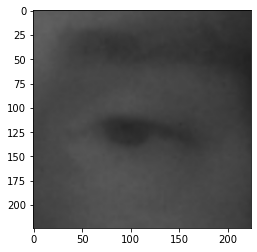

In [3]:
img_array = cv2.imread("s0001_00179_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(224,224))
plt.imshow(new_array)
X_input = np.array(new_array).reshape(-1, 224, 224, 3)

In [4]:
new_model = tf.keras.models.load_model("Drowsy_Detector.h5")

In [5]:
X_input = X_input/255.0

In [6]:
prediction = new_model.predict(X_input)

In [7]:
prediction

array([[0.9999994]], dtype=float32)

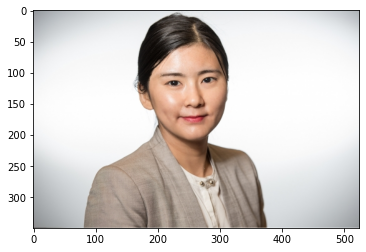

In [8]:
new_img = cv2.imread("test_img.jpg")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

In [9]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

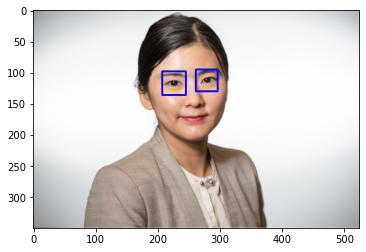

In [10]:
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in eyes:
    cv2.rectangle(new_img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

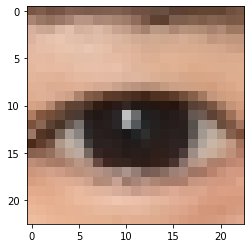

In [11]:
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = new_img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [12]:
eyes_roi.shape

(23, 23, 3)

In [13]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [14]:
final_image.shape

(1, 224, 224, 3)

In [15]:
new_model.predict(final_image)

array([[1.]], dtype=float32)

In [16]:
frequency = 2500
duration = 1000

cam = cv2.VideoCapture(0)

if not cam.isOpened():
    cam = cv2.VideoCapture(1)
if not cam.isOpened():
    raise IOError("Cannot open WebCam")

counter = 0


while True:
    ret,frame = cam.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.2,5)
    for (x,y,w,h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("No eyes detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
    final_image = cv2.resize(eyes_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0
    
    faces = face_cascade.detectMultiScale(frame,1.2,5)
    
    #draw rect around faces
    
    for x,y,w,h in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
        
    font = cv2.FONT_HERSHEY_COMPLEX
    
    
    x1,y1,w1,h1 = 0,0,175,75
    cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
    
    prediction_result = new_model.predict(final_image)
    
    
    
    if prediction_result>0.5:
        status = "open eyes"
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/1.5) + 5), font, 0.7, (0,255,0), 2)
        
        cv2.putText(frame, "Focussed", (x1 + int(w1/10), y1 + int(h1/2)), font,
        0.7, (0,255,0), 2)
        counter = 0
    else:
        counter = counter+1
        status = "close eyes"
        cv2.putText(frame, status,  (x1 + int(w1/10), y1 + int(h1/1.5) + 5), font, 0.7, (0,0,255), 2, cv2.LINE_4)
        
        if counter > 5:
            cv2.putText(frame, "Sleep Alert!!!", (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_COMPLEX_SMALL,
            0.7, (0,0,255), 2)
            winsound.Beep(frequency,duration)
    
    cv2.imshow("Drowsiness Detector 9000", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cam.release()
cv2.destroyAllWindows()

No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
No eyes detected
